<a href="https://colab.research.google.com/github/FlintyTub49/DL-Sem-VI/blob/main/Experiment%209/Traffic%20Sign%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import random

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

## Loading The Data

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1tQ2HkQdxCUpAo4twbqN6mu7FYD7Ry5tq' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1tQ2HkQdxCUpAo4twbqN6mu7FYD7Ry5tq" -O train.p && rm -rf /tmp/cookies.txt
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1zJxB1YzBYuImaHBSxWGN-ZXPDRYN_CTX' -O valid.p
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jZhZpEZkYFaaPPAwfd1cB8e-FK0aoeC0' -O test.p

In [3]:
with open("/content/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
X_train.shape, y_train.shape

((34799, 32, 32, 3), (34799,))

## Visualizations

3

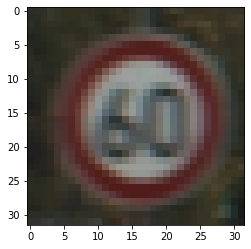

In [6]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

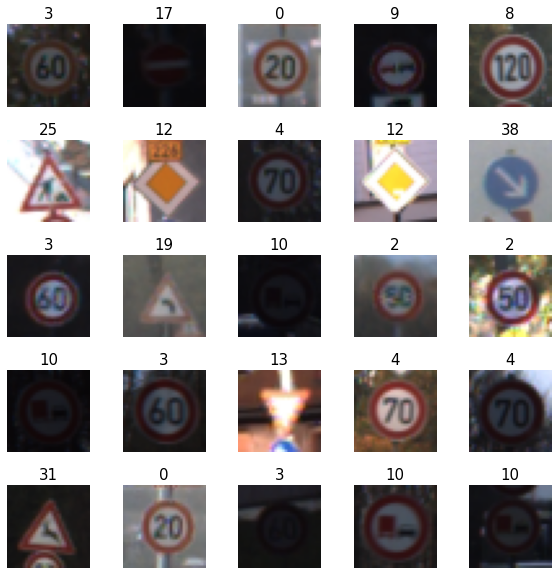

In [7]:
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

## Normalize The Images and Convert them to Grayscale

In [8]:
X_train, y_train = shuffle(X_train, y_train)

In [9]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [10]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [11]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [14]:
X_train_gray_norm.shape, X_validation_gray_norm.shape

((34799, 32, 32, 1), (4410, 32, 32, 1))

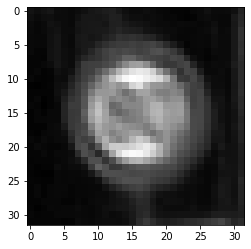

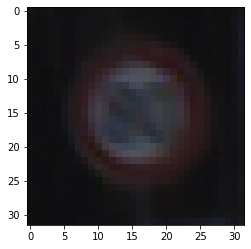

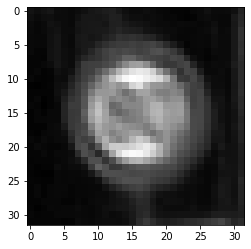

In [13]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

## Build The Model

In [15]:
CNN = models.Sequential()

# First Layer
CNN.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32, 32, 1)))
CNN.add(layers.AveragePooling2D())

# Second Layer
CNN.add(layers.Conv2D(16, (5,5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())

# Flattening Layer
CNN.add(layers.Flatten())

# First Dense Layer
CNN.add(layers.Dense(120, activation = 'relu'))

# Second Dense Layer
CNN.add(layers.Dense(84, activation = 'relu'))

# Output Layer
CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

## Compile and Run The Model

In [18]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = CNN.fit(X_train_gray_norm, y_train, batch_size = 500, epochs = 100, verbose = 1,
                  validation_data = (X_validation_gray_norm, y_validation))

70/70 [==============================] - 0s 6ms/step - loss: 0.0363 - accuracy: 0.9890 - val_loss: 0.7537 - val_accuracy: 0.8882
Epoch 83/100
70/70 [==============================] - 0s 6ms/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 0.8481 - val_accuracy: 0.8882
Epoch 84/100
70/70 [==============================] - 0s 6ms/step - loss: 0.0028 - accuracy: 0.9996 - val_loss: 0.7653 - val_accuracy: 0.8916
Epoch 85/100
70/70 [==============================] - 0s 6ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.7220 - val_accuracy: 0.8989
Epoch 86/100
70/70 [==============================] - 0s 6ms/step - loss: 7.4694e-04 - accuracy: 1.0000 - val_loss: 0.7362 - val_accuracy: 0.8961
Epoch 87/100
70/70 [==============================] - 0s 6ms/step - loss: 5.8221e-04 - accuracy: 1.0000 - val_loss: 0.7458 - val_accuracy: 0.8955
Epoch 88/100
70/70 [==============================] - 0s 6ms/step - loss: 4.7276e-04 - accuracy: 1.0000 - val_loss: 0.7696 - val_accuracy: 0.8964
Epoch 8

## Evaluating Model Performance

In [19]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 2ms/step - loss: 1.3998 - accuracy: 0.8869
Test Accuracy: 0.8869358897209167


### Plotting Model Performance

In [20]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

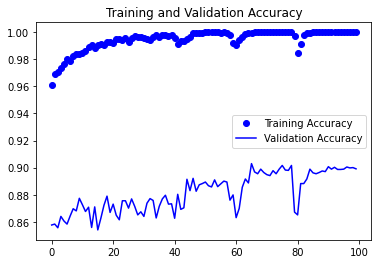

In [21]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

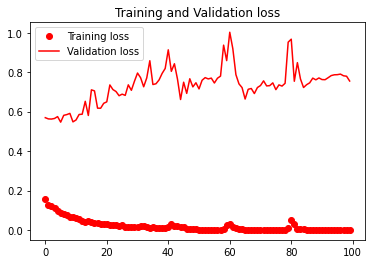

In [22]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [23]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


### Classification Report and Visualizations

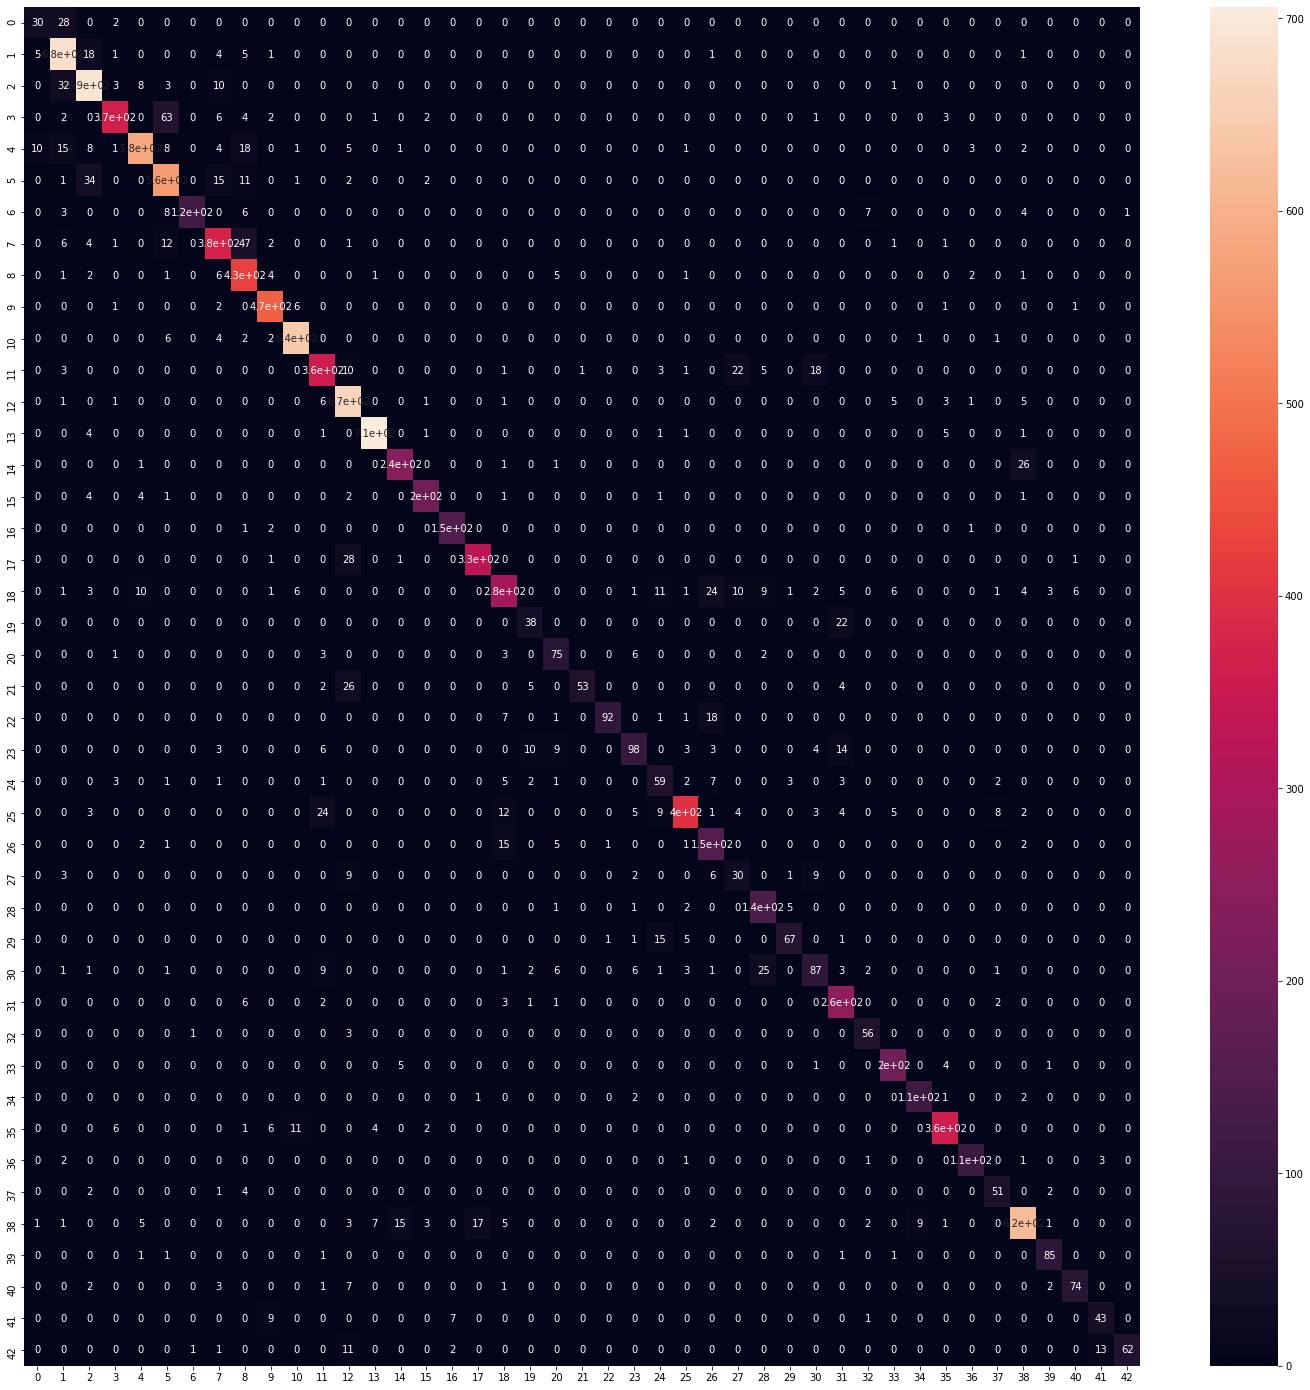

In [24]:
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

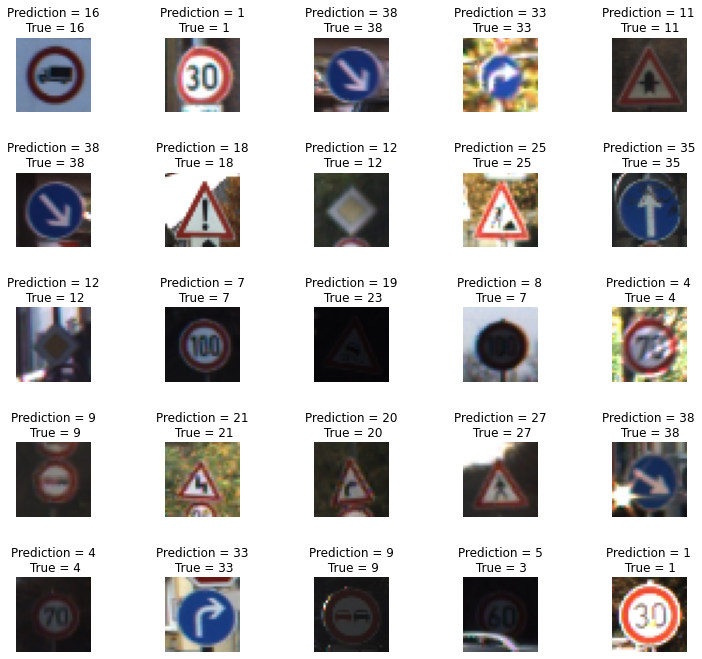

In [25]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    